<a href="https://colab.research.google.com/github/kmohan0602/git-github/blob/master/Immune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scanpy


     |████████████████████████████████| 7.7MB 3.8MB/s 
     |████████████████████████████████| 122kB 44.9MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7018 sha256=49f0e6db1dab6a3558b91ad6ae3ea618923a484dca0d62a0217c091ce1066efd
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo


In [ ]:
import scanpy as sc
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data_mouse = sc.read('/content/drive/MyDrive/Immune_ALL_hum_mou.h5ad')
# data_human = sc.read('/content/drive/MyDrive/Copy of Immune_ALL_human.h5ad')

In [ ]:
data_human

In [ ]:
data_mouse

AnnData object with n_obs × n_vars = 97861 × 8135
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue'
    var: 'gene_id-0-0', 'n_cells-0-0', 'gene_ids-1-0', 'n_cells-1-0', 'gene_ids-2-0', 'feature_types-2-0', 'n_cells-2-0', 'gene_id-3-0', 'n_cells-3-0', 'n_cells-4-0', 'gene_ensembl-0-1', 'n_cells-0-1', 'n_cells-1-1', 'n_cells-2-1'

In [ ]:
# data = data_mouse.concatenate(data_human)
data = data_mouse

In [ ]:
data

AnnData object with n_obs × n_vars = 97861 × 8135
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue'
    var: 'gene_id-0-0', 'n_cells-0-0', 'gene_ids-1-0', 'n_cells-1-0', 'gene_ids-2-0', 'feature_types-2-0', 'n_cells-2-0', 'gene_id-3-0', 'n_cells-3-0', 'n_cells-4-0', 'gene_ensembl-0-1', 'n_cells-0-1', 'n_cells-1-1', 'n_cells-2-1'

In [ ]:
data.obs['final_annotation']
data.obs['batch']

index
AAACCTGCAGCGAACA-1-Oetjen_A            Oetjen_A
AAACCTGCATGTCCTC-1-Oetjen_A            Oetjen_A
AAACCTGGTCGACTGC-1-Oetjen_A            Oetjen_A
AAACCTGGTCGCTTCT-1-Oetjen_A            Oetjen_A
AAACCTGTCCCGACTT-1-Oetjen_A            Oetjen_A
                                         ...   
BoneMarrowcKit_2.CTCGCAAGGACTAGGGTC    MCA_BM_2
BoneMarrowcKit_2.GTATACTATGTAGGTACA    MCA_BM_2
BoneMarrowcKit_2.TCGGGTCGGCAGGAACGC    MCA_BM_2
BoneMarrowcKit_2.TGATCATATGTAACCTGA    MCA_BM_2
BoneMarrowcKit_2.TGTGCGAGCGAGCTCCAT    MCA_BM_2
Name: batch, Length: 97861, dtype: category
Categories (23, object): ['10X', 'Dahlin_1', 'Dahlin_2', 'Dahlin_3', ..., 'Sun_sample2_KC',
                          'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani']

In [ ]:
dge = data.X
dge[0]

array([0.71498084, 0.        , 1.9830525 , ..., 0.        , 0.71498084,
       0.        ], dtype=float32)

In [ ]:
type(dge)

numpy.ndarray

In [ ]:
dge_df = pd.DataFrame(dge)
dge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8095,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108,8109,8110,8111,8112,8113,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123,8124,8125,8126,8127,8128,8129,8130,8131,8132,8133,8134
0,0.714981,0.0,1.983052,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.714981,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.714981,0.0,0.714981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.341549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.127619,0.000000,0.0,0.0,0.0,0.714981,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.714981,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.714981,0.0,2.117343,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.714981,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.208961,0.0,0.0,1.208961,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.097838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.208961,0.0,0.000000,0.0,0.000000,0.0,1.208961,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.740467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.830068,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.830068,0.0,0.000000,0.000000,0.830068,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.723151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.585232,0.830068,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.939853,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.939853,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.337724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.939853,0.939853,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.415662,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.736743,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1.166366,0.0,0.000000,0.0,0.0,0.0,1.166366,0.0,1.166366,0.000000,0.0,0.0,1.166366,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.166366,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.489192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.166366,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.166366,0.0,1.690209,0.0,0.000000,0.000000,1.690209,0.000000,0.0,0.0,0.0,1.166366,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.166366,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97856,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.571155,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
97857,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.460593,0.000000,1.460593,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.460593,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,1.460593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
97858,0.000000,0.0,0.000000,0.0,0.0,0.0,1.357165,0.0

In [ ]:
np.random.RandomState(10)
points = np.random.randint(0,dge_df.shape[0],2000)
points

array([24655, 28626, 96900, ..., 55559,  7289, 44767])

In [ ]:
points = np.arange(0,2000)
points

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [ ]:
len(points)

2000

In [ ]:
cell_type = data.obs['final_annotation']
cell_type = cell_type[:2000]
len(cell_type)

2000

In [ ]:
cell_type

index
AAACCTGCAGCGAACA-1-Oetjen_A       Monocytes
AAACCTGCATGTCCTC-1-Oetjen_A    CD4+ T cells
AAACCTGGTCGACTGC-1-Oetjen_A       Monocytes
AAACCTGGTCGCTTCT-1-Oetjen_A       Monocytes
AAACCTGTCCCGACTT-1-Oetjen_A       NKT cells
                                   ...     
GTTCTCGTCCTTAATC-1-Oetjen_A    CD4+ T cells
GTTTCTACATGACATC-1-Oetjen_A           HSPCs
GTTTCTAGTTATGCGT-1-Oetjen_A    Erythrocytes
GTTTCTAGTTCAGTAC-1-Oetjen_A    Erythrocytes
GTTTCTATCGAATCCA-1-Oetjen_A           HSPCs
Name: final_annotation, Length: 2000, dtype: category
Categories (19, object): ['B cells', 'Basophils', 'CD4+ T cells', 'CD8+ T cells', ...,
                          'Neutrophils', 'Plasma cells', 'Plasmacytoid dendritic cells',
                          'T cells']

In [ ]:
dge_df.shape

(97861, 8135)

In [ ]:
# dge_df = dge_df.iloc[points]
dge_df = dge_df[:2000]
dge_df.shape

(2000, 8135)

In [ ]:
dge_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8095,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108,8109,8110,8111,8112,8113,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123,8124,8125,8126,8127,8128,8129,8130,8131,8132,8133,8134
0,0.714981,0.0,1.983052,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.714981,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.714981,0.0,0.714981,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.341549,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,1.127619,0.000000,0.000000,0.000000,0.000000,0.714981,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.714981,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.714981,0.000000,2.117343,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.714981,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.208961,0.0,0.0,1.208961,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3.097838,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.208961,0.0,0.000000,0.0,0.000000,0.0,1.208961,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,1.740467,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.830068,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.830068,0.0,0.000000,0.0,0.830068,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.723151,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,1.585232,0.830068,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.939853,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.939853,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.337724,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.939853,0.939853,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.415662,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,1.736743,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,1.166366,0.0,0.000000,0.0,0.000000,0.0,1.166366,0.0,1.166366,0.000000,0.0,0.0,1.166366,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.166366,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.489192,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,1.166366,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.166366,0.0,1.690209,0.0,0.000000,0.000000,1.690209,0.0,0.000000,0.0,0.0,1.166366,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.166366,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.0,1.015489,0.0,0.000000,0.0,1.015489,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.015489,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.923544,0.0,0.000000,1.015489,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.508827,0.000000,0.000000,1.015489,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.015489,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.000000,1.837710,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1996,0.343043,0.0,0.0000

In [ ]:
%%time
pca_transformed = sc.pp.pca(dge_df, n_comps=1000)
pca_transformed

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


CPU times: user 1min 8s, sys: 28.6 s, total: 1min 36s
Wall time: 58.4 s


In [ ]:
pca_transformed.shape

(2000, 1000)

In [ ]:
%%time
tsne_transformed = TSNE(n_components=2).fit_transform(pca_transformed)
tsne_transformed.shape

CPU times: user 52.1 s, sys: 0 ns, total: 52.1 s
Wall time: 31.7 s


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


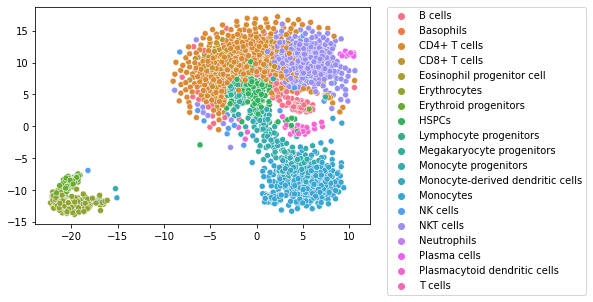

In [ ]:
sns.scatterplot(tsne_transformed[:,0],tsne_transformed[:,1], hue = cell_type)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
len(np.unique(cell_type.values))

14

In [ ]:
labels = cell_type.values
# print(labels)
df = pd.DataFrame(cell_type.values,
                  columns=['Groups'])
# df = df.iloc[:-47]
labels = df.values.reshape(-1,).tolist()


In [ ]:
df['Groups'] = df['Groups'].astype('category')
print(df['Groups'])
df['Groups'] = df['Groups'].cat.codes
df['Groups']

0          Monocytes
1       CD4+ T cells
2          Monocytes
3          Monocytes
4          NKT cells
            ...     
1995    CD4+ T cells
1996           HSPCs
1997    Erythrocytes
1998    Erythrocytes
1999           HSPCs
Name: Groups, Length: 2000, dtype: category
Categories (19, object): ['B cells', 'Basophils', 'CD4+ T cells', 'CD8+ T cells', ...,
                          'Neutrophils', 'Plasma cells', 'Plasmacytoid dendritic cells',
                          'T cells']


0       12
1        2
2       12
3       12
4       14
        ..
1995     2
1996     7
1997     5
1998     5
1999     7
Name: Groups, Length: 2000, dtype: int8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_transformed, df['Groups'], test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 1000)
(400, 1000)
(1600,)
(400,)


In [ ]:
batch_size=32

In [ ]:
def sample_z(shape=batch_size, latent_dim=10, n_c=14, fix_class=-1, req_grad=False):

    assert (fix_class == -1 or (fix_class >= 0 and fix_class < n_c) ), "Requested class %i outside bounds."%fix_class

    Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

    # Tensor = torch.cuda.FloatTensor
    
    # Sample noise as generator input, zn
    zn = Variable(Tensor(np.random.normal(0, 0.0001, (shape, latent_dim))), requires_grad=req_grad)#changed 0.75 to 0.01 for testing

    ######### zc, zc_idx variables with grads, and zc to one-hot vector
    # Pure one-hot vector generation
    zc_FT = Tensor(shape, n_c).fill_(0)
    zc_idx = torch.empty(shape, dtype=torch.long)

    if (fix_class == -1):
        if cuda:
            zc_idx = zc_idx.random_(n_c).cuda()
        else:
            zc_idx = zc_idx.random_(n_c)
        zc_FT = zc_FT.scatter(1, zc_idx.unsqueeze(1), 1.)
    else:
        zc_idx[:] = fix_class
        zc_FT[:, fix_class] = 1
        if cuda:
            zc_idx = zc_idx.cuda()
            zc_FT = zc_FT.cuda()
        else:
            zc_idx = zc_idx
            zc_FT = zc_FT

    zc = Variable(zc_FT, requires_grad=req_grad)

    # Return components of latent space variable
    return zn, zc, zc_idx

In [ ]:
def calc_gradient_penalty(netD, real_data, generated_data):
    # GP strength
    LAMBDA = 10

#     b_size = real_data.size()[0]
    b_size = batch_size
#     print("real_data shape: ",real_data.shape)
    # Calculate interpolation
    alpha = torch.rand(batch_size,1)
    alpha = alpha.expand_as(real_data)
    if cuda:
        alpha = alpha.cuda()
    
    interpolated = alpha * real_data.data + (1 - alpha) * generated_data.data
    interpolated = Variable(interpolated, requires_grad=True)
    if cuda:
        interpolated = interpolated.cuda()

    # Calculate probability of interpolated examples
    prob_interpolated = netD(interpolated)

    # Calculate gradients of probabilities with respect to examples
    gradients = torch_grad(outputs=prob_interpolated, inputs=interpolated,
                           grad_outputs= torch.ones(prob_interpolated.size()).cuda() if cuda else torch.ones(prob_interpolated.size()),
                           create_graph=True, retain_graph=True)[0]

    # Gradients have shape (batch_size, num_channels, img_width, img_height),
    # so flatten to easily take norm per example in batch
    gradients = gradients.view(b_size, -1)

    # Derivatives of the gradient close to 0 can cause problems because of
    # the square root, so manually calculate norm and add epsilon
    gradients_norm = torch.sqrt(torch.sum(gradients ** 2, dim=1) + 1e-12)

    # Return gradient penalty
    return LAMBDA * ((gradients_norm - 1) ** 2).mean()


In [ ]:

# Weight Initializer
def initialize_weights(net):
    for m in net.modules():
        if isinstance(m, nn.Conv2d):
            m.weight.data.normal_(0, 0.02)
            m.bias.data.zero_()
        elif isinstance(m, nn.ConvTranspose2d):
            m.weight.data.normal_(0, 0.02)
            m.bias.data.zero_()
        elif isinstance(m, nn.Linear):
            m.weight.data.normal_(0, 0.02)
            m.bias.data.zero_()


In [ ]:


# Softmax function
def softmax(x):
    return F.softmax(x, dim=1)


In [ ]:
from __future__ import print_function

import argparse
import os
import numpy as np

from torch.autograd import Variable
from torch.autograd import grad as torch_grad

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

from itertools import chain as ichain

In [ ]:
class Generator_NN(nn.Module):
    """
    NN to model the generator of a ClusterGAN
    Input is a vector from representation space of dimension z_dim
    output is a vector from space of dimension X_dim
    """
    # Architecture : FC1024_BR-FC7x7x128_BR-(64)4dc2s_BR-(1)4dc2s_S
    def __init__(self, latent_dim, n_c, x_shape, verbose=False):
        super(Generator_NN, self).__init__()

        self.name = 'generator'
        self.latent_dim = latent_dim
        self.n_c = n_c
        self.x_shape = x_shape
#         self.ishape = (128, 7, 7)
#         self.iels = int(np.prod(self.ishape))
        self.verbose = verbose
        
        self.model = nn.Sequential(
            # Fully connected layers
            torch.nn.Linear(self.latent_dim + self.n_c, 1000),
            nn.BatchNorm1d(1000),
            nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Linear(1000, 1000),
#             nn.BatchNorm1d(1000),
#             nn.LeakyReLU(0.2, inplace=True),
        
            # Reshape to 128 x (7x7)
#             Reshape(self.ishape),

            # Upconvolution layers
#             nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=True),
#             nn.BatchNorm2d(64),
#             nn.LeakyReLU(0.2, inplace=True),
            
#             nn.ConvTranspose2d(64, 1, 4, stride=2, padding=1, bias=True),
            nn.Sigmoid()
        )

        initialize_weights(self)

        if self.verbose:
            print("Setting up {}...\n".format(self.name))
            print(self.model)
    
    def forward(self, zn, zc):
        z = torch.cat((zn, zc), 1)
        x_gen = self.model(z)
#         print(x_gen.size(0))
#         print(*self.x_shape)
        # Reshape for output
#         x_gen = x_gen.view(x_gen.size(0), *self.x_shape)
        return x_gen
        # batches, channels, x , y

In [ ]:
class Encoder_NN(nn.Module):
    """
    NN to model the encoder of a ClusterGAN
    Input is vector X from space if dimension X_dim
    Output is vector z from representation space of dimension z_dim
    """
    def __init__(self, latent_dim, n_c, verbose=False):
        super(Encoder_NN, self).__init__()

        self.name = 'encoder'
        self.channels = 1
        self.latent_dim = latent_dim
        self.n_c = n_c
        self.verbose = verbose
        
        self.model = nn.Sequential(
            torch.nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Linear(1000, latent_dim + n_c)
        )

        initialize_weights(self)
        
        if self.verbose:
            print("Setting up {}...\n".format(self.name))
            print(self.model)

    def forward(self, in_feat):
        z_img = self.model(in_feat)
        # Reshape for output
        z = z_img.view(z_img.shape[0], -1)
        # Separate continuous and one-hot components
        zn = z[:, 0:self.latent_dim]
        zc_logits = z[:, self.latent_dim:]
        # Softmax on zc component
        zc = softmax(zc_logits)
        return zn, zc, zc_logits

In [ ]:
class Discriminator_NN(nn.Module):
    """
    NN to model the discriminator of a ClusterGAN
    Input is tuple (X,z) of a vector and its corresponding
    representation z vector. For example, if X comes from the dataset, corresponding
    z is Encoder(X), and if z is sampled from representation space, X is Generator(z)
    Output is a 1-dimensional value
    """            
    # Architecture : (64)4c2s-(128)4c2s_BL-FC1024_BL-FC1_S
    def __init__(self, wass_metric=False, verbose=False):
        super(Discriminator_NN, self).__init__()
        
        self.name = 'discriminator'
        self.wass = False
        self.verbose = verbose
        
        self.model = nn.Sequential(
            # Fully connected layers
            torch.nn.Linear(1000, 1000),
            nn.LeakyReLU(0.2, inplace=True),
            torch.nn.Linear(1000, 1)
        )
        
        # If NOT using Wasserstein metric, final Sigmoid
        if (not self.wass):
            self.model = nn.Sequential(self.model, torch.nn.Sigmoid())

        initialize_weights(self)

        if self.verbose:
            print("Setting up {}...\n".format(self.name))
            print(self.model)

    def forward(self, img):
        # Get output
#         print(img.shape)
        validity = self.model(img)
        return validity



In [ ]:
# Training details
# n_epochs = args.n_epochs
# batch_size = args.batch_size
n_epochs = 40

test_batch_size = 240
# lr = args.learning_rate
lr =0.0001
b1 = 0.5
b2 = 0.9
decay = 2.5*1e-5
# n_skip_iter = args.n_critic
n_skip_iter=5

# Data dimensions
# img_size = args.img_size
img_size=1000
channels = 1

# Latent space info
# latent_dim = args.latent_dim
# latent_dim=3
latent_dim=10
# n_c = 10
# betan = 10
# betac = 10

n_c = 14
betan = 10
betac = 10

# Wasserstein+GP metric flag
wass_metric  = True

In [ ]:
# x_shape = (channels, img_size, img_size)
x_shape = (1000,1)

cuda = True if torch.cuda.is_available() else False
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Loss function
bce_loss = torch.nn.BCELoss()
xe_loss = torch.nn.CrossEntropyLoss()
mse_loss = torch.nn.MSELoss()

# Initialize generator and discriminator
generator = Generator_NN(latent_dim, n_c, x_shape)
encoder = Encoder_NN(latent_dim, n_c)
discriminator = Discriminator_NN(wass_metric=wass_metric)

In [ ]:
if cuda:
    generator.cuda()
    encoder.cuda()
    discriminator.cuda()
    bce_loss.cuda()
    xe_loss.cuda()
    mse_loss.cuda()
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [ ]:
class CellDataset(Dataset):
    def __init__(self,X,y):
        self.len = X.shape[0]
        X =  X.copy()
        y = y.to_numpy()
        self.x_data = torch.from_numpy(X)##X
        self.y_data = torch.from_numpy(y)##y
    def __getitem__(self,index):
        return self.x_data[index], self.y_data[index]
    def __len__(self):
        return self.len

In [ ]:
all_dataset = CellDataset(pca_transformed,df['Groups'])
train_dataset = CellDataset(X_train,y_train)
test_dataset  = CellDataset(X_test,y_test)

In [ ]:
all_dataloader = torch.utils.data.DataLoader(dataset=all_dataset,
    batch_size=df.shape[0],
    shuffle=False,
)

In [ ]:
# Configure data loader
# os.makedirs("../../data/mnist", exist_ok=True)
dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)


In [ ]:
# Test data loader
testdata = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True
)
test_imgs, test_labels = next(iter(testdata))
test_imgs = Variable(test_imgs.type(Tensor))

In [ ]:
ge_chain = ichain(generator.parameters(),
                  encoder.parameters())

optimizer_GE = torch.optim.Adam(ge_chain, lr=lr, betas=(b1, b2), weight_decay=decay)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

In [ ]:
# ----------
#  Training
# ----------
ge_l = []
d_l = []

c_zn = []
c_zc = []
c_i = []

# print("dataloadder shape: ", dataloader.shape)
# Training loop 
print('\nBegin training session with %i epochs...\n'%(n_epochs))
for epoch in range(n_epochs):
    for i, (imgs, itruth_label) in enumerate(dataloader):
#         print("data shape", imgs.shape)
#         print("label shape", itruth_label)
        # Ensure generator/encoder are trainable
        generator.train()
        encoder.train()

        # Zero gradients for models
        generator.zero_grad()
        encoder.zero_grad()
        discriminator.zero_grad()
        
        # Configure input
        real_imgs = Variable(imgs.type(Tensor))
#         real_imgs = Variable(torch.from_numpy(imgs))
#         real_imgs = imgs

        # ---------------------------
        #  Train Generator + Encoder
        # ---------------------------
        
        optimizer_GE.zero_grad()
        
        # Sample random latent variables
        zn, zc, zc_idx = sample_z(shape=batch_size,
                                  latent_dim=latent_dim,
                                  n_c=n_c)

        # Generate a batch of images
        gen_imgs = generator(zn, zc)
        
        # Discriminator output from real and generated samples
        D_gen = discriminator(gen_imgs.detach())
        D_real = discriminator(real_imgs)
        
        # Step for Generator & Encoder, n_skip_iter times less than for discriminator
        if (i % n_skip_iter == 0):
            # Encode the generated images
            enc_gen_zn, enc_gen_zc, enc_gen_zc_logits = encoder(gen_imgs)

            # Calculate losses for z_n, z_c
            zn_loss = mse_loss(enc_gen_zn, zn)
            zc_loss = xe_loss(enc_gen_zc_logits, zc_idx)

            # Check requested metric
            if wass_metric:
                # Wasserstein GAN loss
                ge_loss = torch.mean(D_gen) + betan * zn_loss + betac * zc_loss
            else:
                # Vanilla GAN loss
                valid = Variable(Tensor(gen_imgs.size(0), 1).fill(1.0), requires_grad=False)
                v_loss = bce_loss(D_gen, valid)
                ge_loss = v_loss + betan * zn_loss + betac * zc_loss

            ge_loss.backward(retain_graph=True)
            optimizer_GE.step()

        # ---------------------
        #  Train Discriminator
        # ---------------------

        optimizer_D.zero_grad()

        # Measure discriminator's ability to classify real from generated samples
        if wass_metric:
            # Gradient penalty term
#             print("real data size: ",real_imgs.shape)
#             print("gen data size: ",gen_imgs.shape)
            grad_penalty = calc_gradient_penalty(discriminator, real_imgs, gen_imgs)

            # Wasserstein GAN loss w/gradient penalty
            d_loss = torch.mean(D_real) - torch.mean(D_gen) + grad_penalty
            
        else:
            # Vanilla GAN loss
            fake = Variable(Tensor(gen_imgs.size(0), 1).fill(0.0), requires_grad=False)
            real_loss = bce_loss(D_real, valid)
            fake_loss = bce_loss(D_gen, fake)
            d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()


    # Save training losses
    d_l.append(d_loss.item())
    ge_l.append(ge_loss.item())
    print('discriminator loss = ',d_loss.item, '  ge_loss = ',ge_loss.item())

    # Generator in eval mode
    generator.eval()
    encoder.eval()

    # Set number of examples for cycle calcs
    n_sqrt_samp = 5
    n_samp = n_sqrt_samp * n_sqrt_samp


    ## Cycle through test real -> enc -> gen
    t_imgs, t_label = test_imgs.data, test_labels
    # Encode sample real instances
    e_tzn, e_tzc, e_tzc_logits = encoder(t_imgs)
    
#     print("e_tzn shape: ",e_tzn.shape)
#     print("e_tzc shape: ",e_tzc.shape)
#     print("e_tzc_logits shape: ",e_tzc_logits.shape)
    # Generate sample instances from encoding
    teg_imgs = generator(e_tzn, e_tzc)
    # Calculate cycle reconstruction loss
    img_mse_loss = mse_loss(t_imgs, teg_imgs)
    # Save img reco cycle loss
    c_i.append(img_mse_loss.item())
   

    ## Cycle through randomly sampled encoding -> generator -> encoder
    zn_samp, zc_samp, zc_samp_idx = sample_z(shape=n_samp,
                                             latent_dim=latent_dim,
                                             n_c=n_c)
    # Generate sample instances
    gen_imgs_samp = generator(zn_samp, zc_samp)

    # Encode sample instances
    zn_e, zc_e, zc_e_logits = encoder(gen_imgs_samp)

    # Calculate cycle latent losses
    lat_mse_loss = mse_loss(zn_e, zn_samp)
    lat_xe_loss = xe_loss(zc_e_logits, zc_samp_idx)

    # Save latent space cycle losses
    c_zn.append(lat_mse_loss.item())
    c_zc.append(lat_xe_loss.item())
  
    # Save cycled and generated examples!
    r_imgs, i_label = real_imgs.data[:n_samp], itruth_label[:n_samp]
    e_zn, e_zc, e_zc_logits = encoder(r_imgs)
    reg_imgs = generator(e_zn, e_zc)
#     save_image(reg_imgs.data[:n_samp],
#                'images/cycle_reg_%06i.png' %(epoch), 
#                nrow=n_sqrt_samp, normalize=True)
#     save_image(gen_imgs_samp.data[:n_samp],
#                'images/gen_%06i.png' %(epoch), 
#                nrow=n_sqrt_samp, normalize=True)
    
    ## Generate samples for specified classes
    stack_imgs = []
    for idx in range(n_c):
        # Sample specific class
        zn_samp, zc_samp, zc_samp_idx = sample_z(shape=n_c,
                                                 latent_dim=latent_dim,
                                                 n_c=n_c,
                                                 fix_class=idx)

        # Generate sample instances
        gen_imgs_samp = generator(zn_samp, zc_samp)

        if (len(stack_imgs) == 0):
            stack_imgs = gen_imgs_samp
        else:
            stack_imgs = torch.cat((stack_imgs, gen_imgs_samp), 0)

    # Save class-specified generated examples!
#     save_image(stack_imgs,
#                'images/gen_classes_%06i.png' %(epoch),
#                nrow=n_c, normalize=True)
 

    print ("[Epoch %d/%d] \n"\
           "\tModel Losses: [D: %f] [GE: %f]" % (epoch, 
                                                 n_epochs, 
                                                 d_loss.item(),
                                                 ge_loss.item())
          )
    
    print("\tCycle Losses: [x: %f] [z_n: %f] [z_c: %f]"%(img_mse_loss.item(), 
                                                         lat_mse_loss.item(), 
                                                         lat_xe_loss.item())
         )


Begin training session with 40 epochs...

discriminator loss =  <built-in method item of Tensor object at 0x7f032e5b8d80>   ge_loss =  24.137277603149414
[Epoch 0/40] 
	Model Losses: [D: 3.908346] [GE: 24.137278]
	Cycle Losses: [x: 1.047504] [z_n: 0.000266] [z_c: 2.601551]
discriminator loss =  <built-in method item of Tensor object at 0x7f032da35798>   ge_loss =  19.16605567932129
[Epoch 1/40] 
	Model Losses: [D: 2.777281] [GE: 19.166056]
	Cycle Losses: [x: 1.052669] [z_n: 0.002008] [z_c: 1.935334]
discriminator loss =  <built-in method item of Tensor object at 0x7f032ce474c8>   ge_loss =  15.317766189575195
[Epoch 2/40] 
	Model Losses: [D: 2.688425] [GE: 15.317766]
	Cycle Losses: [x: 1.052990] [z_n: 0.002240] [z_c: 1.416032]
discriminator loss =  <built-in method item of Tensor object at 0x7f032e5b81b0>   ge_loss =  11.832995414733887
[Epoch 3/40] 
	Model Losses: [D: 2.701421] [GE: 11.832995]
	Cycle Losses: [x: 1.053161] [z_n: 0.002330] [z_c: 0.955554]
discriminator loss =  <built-i

In [ ]:
tf = e_tzc[2:3].data
tf.argmax()
for i, (data, label) in enumerate(all_dataloader):
#     print(i)
#     print(data.shape, label.shape)
#     sys.exit()
    zn,zc,zl = encoder(data)

In [ ]:
(zc.detach().numpy()[0].argmax())+1

8

In [ ]:
cluster_labels=[]
for i in zc.detach().numpy():
    cluster_labels.append((i.argmax())+1)

In [ ]:
len(cluster_labels)

2000

In [ ]:
final_embedding = zn.detach().numpy()

type(final_embedding)
final_embedding.shape

(2000, 10)

In [ ]:
tsne = TSNE()
data_embedded = tsne.fit_transform(final_embedding)

In [ ]:
len(labels)

2000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


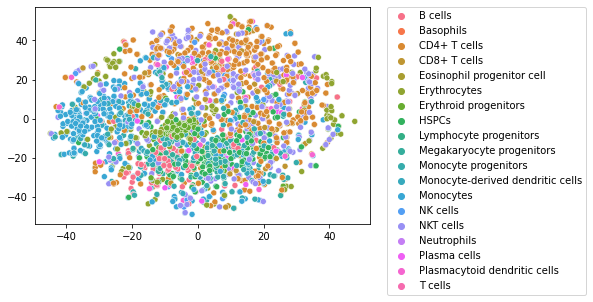

In [ ]:
sns.scatterplot(data_embedded[:,0], data_embedded[:,1], hue=cell_type)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)